## 2.2 Network Topology

Before the introduction the average consensus algorithm, we need to discuss the network topology first. Suppose the agents are connected with topology $\mathcal{G} = (\mathcal{V}, \mathcal{E})$, where $\mathcal{V}= \{1,2,\cdots, n\}$ is the set of agents and $\mathcal{E}$ is the set of edges. The topology can be of any shape, but its degree and connectivity will affect the communication efficiency and convergence rate of the methods, see more discussion in Sec. \[GPU Training\]. 

The agents can be connected by a directed or undirected network. If node $j$ is an incoming neighbor of node $i$, i.e., edge $(j,i)$ exists, we have $j\in \mathcal{N}_{\rm in}(i)$ where $\mathcal{N}_{\rm in}(i)$ is the set of incoming neighbors. In contrast, if node $j$ is an outgoing neighbor of node $i$, i.e., edge $(i,j)$ exists, we have $j\in \mathcal{N}_{\rm out}(i)$ where $\mathcal{N}_{\rm out}(i)$ is the set of outgoing neighbors. For average consensus algorithm, we focus more on the incoming neighbors. Therefore, we typically skip the subscript ''in'' and let $\mathcal{N}(i)$ denote the set of incoming neighbors.

Apparently, the neighborhood relation of each node will be determined once the network topology is given. Avergence conesus will let each node communicate within the topology-defined neighborhood.


In [2]:
import numpy as np
import bluefog.torch as bf
import torch
import networkx as nx   # nx will be used for network topology creating and plotting
from bluefog.common import topology_util
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2.1 Example: the ring graph

Now we use a simple example to illustrate the above concepts. We use [NetworkX](https://networkx.org/) package to manage the topology/graph/network object in the BlueFog. BlueFog provide several utility functions to generate several common graphs. Following is the ring graph. Each agent connects with other two agents that are $+1$ and $-1$ (modoluo size $N$) different from self rank.

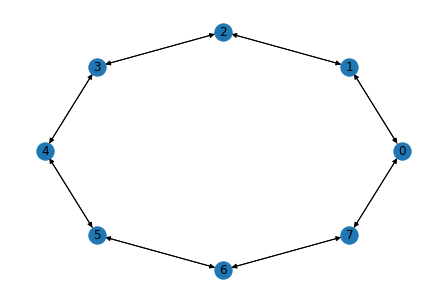

In [4]:
G = topology_util.RingGraph(8)
labels={i: i for i in range(8)}
nx.draw_circular(G, labels=labels)

In [5]:
rank = 0
print(f"Neighbors and self of rank {rank} in Ring graph: ", list(G.neighbors(rank)))

Neighbors of rank 0 in Ring graph:  [0, 1, 7]


### 2.2.2 Example: the exponential-two graph

Exponential-two graph is an important network topology that we will utilize frequently in following sections. In the exponential-two graph, each agent will send information to agents that are $2^0, 2^1, \cdots, 2^T$ hops away. BlueFog provides APIs that can generate exponential-two graph easily. In the following example, we will draw the exponential-two graph with BlueFog and illustrate the incoming neighbor and outgoing neighbors.
We next draw an exponential-2 graph with $8$ agents.

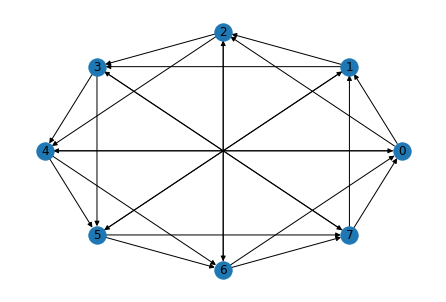

In [6]:
G = topology_util.ExponentialTwoGraph(8)
nx.draw_circular(G, labels=labels)

In the above exponential-two graph, each agent reaches out to nodes that are $1$ $2$, and $4$ hops away. For agent $0$, its coming neighbors are $\mathcal{N}_{\rm in}(i) = \{4,6,7\}$ and outgoing neighbors are $\mathcal{N}_{\rm out}(i) = \{1,2,4\}$.

In [9]:
rank = 0
print("Incoming neighbors and self of rank {rank} in G: ", list(G.predecessors(rank)))
print("Outgoing neighbors and self of rank {rank} in G: ", list(G.successors(rank)))  # Same as G.neighbors

Incoming neighbors and self of rank {rank} in G:  [0, 4, 6, 7]
Outgoing neighbors and self of rank {rank} in G:  [0, 1, 2, 4]
